# Analyzing Trends in News Headlines
---

## Introduction
---

Whenever I opened a homepage of a news website, I was greeted with at least five most recent news headlines. Usually, four out of five or even all the headlines carried a negative message, "a plain crashed", "new virus was found", "there is a nuclear threat", "a terrorist group has done something", etc. While I opened the homepage with a good mood, after reading a few negative headlines, my mood would instantly change and I would get depressed, because so many bad things are happening to our society.

There were many posts written about why the headlines are dominated with negative news, some say it is, because the news come from all over the world, and that is why it seems that only negative things are happening around us, even though nothing bad happened in their your city. Another, very interesting reason I read about, is that people make naive decisions while they are depressed. Businesses can benefit from this, because while people are depressed they are more scared to lose their job, and since everyone is in constant stress the sales in the entertainment industry have been on the rise. Financial institutions can also benefit from this, since people are depressed they make unwise decisions and sell their investments (house, car, stacks, etc.) at low cost.

I have decided to check if the news publishers try to manipulate people using the top news headlines (since that's what most people see most of the time). For this I used three news publishers that were best known to me, they were Russia Today (RT), The Washington Times (WT), and The Canadian Broadcasting Corporation (CBC). I decided to collect and analyze political news headlines of theses news publishers.

To try to support some of the assumptions about negative news headlines, for example "... since everyone is in constant stress the sales ... have been on the rise", I have decided to analyze the changes in the number of negative headlines produced by CBC during the The Calgary Stampede festival. I also wanted to find any patterns in negative news headlines being posted in general, for example, if there are always less negative headlines on Tuesdays, or if there are always more negative headlines on the first day of the month, etc.

While collecting news headlines, I have noticed that in many of the headlines the names, such as Trump, Putin, and Trudeau came up very often, I have decided to collect this data, and in the end, see who is the most "famous" president/prime minister. Also, a lot of the headlines had country names in them, I have decided to collect this data as well, and later see, which country makes it into the news most often.

## Collecting Data
---

### Data Sources

For my sources I decided to scrape websites of three news publishers for approximately one month. I scraped the homepage of [RT](https://www.rt.com/), the politics page of [The Washington Times](http://www.washingtontimes.com/news/politics/), and the politics page of [CBC News](http://www.cbc.ca/news/politics).

To scrape the websites, I made a Python script `scraper.py`, the script collected news headlines at different times throughout the day. The script would scrape all three websites in the morning at 11:00AM, then during the day at 14:00PM. and finally in the evening at 18:00PM. 

The reason for using three different news publishers and scheduling the script to scrape at different times throughout the day was, because I was trying to get as much variation as possible, to help me find as many insights from the data.

### Automating Work

To save myself the time and headache of remembering to scrape the websites at certain times, I spun a simple Ubuntu droplet on DigitalOcean. I used the [Python Schedule package](https://pypi.python.org/pypi/schedule) to automate the script to run at specific times throughout the day.

To run the script as a background process I used the following command `nohup python3 scraper.py > scraper.out 2>scraper.err &`.


### Watson API

To analyze the news headlines I used IBM's Watson [Natural Language Understanding](https://natural-language-understanding-demo.mybluemix.net/) (NLU) API. NLU is a collection of different APIs that analyze text to help understand its concepts, entities, keywords, sentiment, and more.

For every news headline, I requested the sentiment analysis, emotions, and entities to be returned by the NLU API.

* Sentiment Analysis - provides a label for every headline, either negative, positive, or neutral, and score, between -1 and 1.
* Emotions - provides individual scores for each of the following, joy, anger, disgust, sadness, and fear. Each score was between 0 and 1, such that sum(joy score, anger score, disgust score, sadness score, and fear score) is always 1.
* Entities - identifies people, companies, countries, etc.

### Scraper Script

The following is a chunk from `scraper.py` script, the chunk was used to scrape, analyse, and then write the information (news headlines and their analysis) to a `.txt` file from the RT homepage. Similarly structured code was used to scrape and save the analysis for headlines from the other two publishers.

```python
    ...

    with open(filename, mode) as fp:

        # Start of Russia Today news
        fp.write('N RT\n')

        # Scrapes the website of Russia Today news network and writes news headlines to a file
        for ul_tag in soup.find_all('ul', {'class': 'main-promobox__list'}):
            for li_tag in ul_tag.find_all('li', {'class': 'main-promobox__item'}):
                for headline in li_tag.find_all('a', {'class': 'main-promobox__link'}):

                    news_headline = headline.text.lstrip().replace('\n', '')

                    fp.write('H ')
                    fp.write(news_headline)
                    fp.write('\n')
                    fp.write('J ')
                    json.dump(NLU.analyze(text=news_headline, features=[features.Sentiment(), 
                            features.Emotion(), features.Entities()]), fp)
                    fp.write('\n')
    ...
```

## Data Wrangling
---
    
### Storing/Saving Data

The following is a chunk from one of the `.txt` files containing information (news headlines and their analysis) from all three news publishers. It shows how the information was stored after every time the websites was parsed.

The data shows the first two headlines from RT homepage.

* **N** indicates the start of a new news publisher
* **H** indicates a new headline
* **J** indicates the NLU analysis of the above headline

```sh
...

N RT

H ‘Putin wanted Hillary Clinton to win the election’ – Trump                                                                    
J {"language": "en", "entities": [{"relevance": 0.33, "count": 1, "text": "Hillary Clinton", "type": "Person", "disambiguation": {"dbpedia_resource": "http://dbpedia.org/resource/Hillary_Rodham_Clinton", "name": "Hillary Rodham Clinton", "subtype": ["Politician", "Appointee", "AwardWinner", "BoardMember", "Celebrity", "HallOfFameInductee", "OperaCharacter", "Senator", "U.S.Congressperson", "TVActor"]}}, {"relevance": 0.33, "count": 1, "text": "Trump", "type": "Company"}], "sentiment": {"document": {"label": "neutral", "score": 0.0}}, "emotion": {"document": {"emotion": {"anger": 0.179606, "disgust": 0.139299, "sadness": 0.270869, "joy": 0.256665, "fear": 0.082043}}}}

H Berlin to boost aviation safety amid fears hackers can hijack warplanes                                                                    
J {"language": "en", "entities": [{"relevance": 0.33, "count": 1, "text": "Berlin", "type": "Location", "disambiguation": {"subtype": ["City"]}}], "sentiment": {"document": {"label": "neutral", "score": 0.0}}, "emotion": {"document": {"emotion": {"anger": 0.020501, "disgust": 0.034013, "sadness": 0.011869, "joy": 0.021755, "fear": 0.755602}}}}

...
```

### JSON to CSV

To be able to work with the collected information using the Python `pandas` module, I had to convert it into a `pandas` readable format, such as CSV. The following shows the parsed version of the above chuck from the `.txt` file in a CSV format.

In [7]:
import pandas as pd

# Read data into a dataframe
example = pd.read_csv('Datasets/JSON-to-CSV-Example.csv')

# Remove the ID column
example = example.iloc[:, 1:]

# Show the first 2 rows of the dataframe
example.head(2)

,DATE,TIME,TIME_OF_DAY,NETWORK,HEADLINE,SENTIMENT_LABEL,SENTIMENT_SCORE,EMOTION_SADNESS,EMOTION_FEAR,EMOTION_ANGER,EMOTION_DISGUST,EMOTION_JOY,PUTIN,TRUMP,TRUDEAU
0,2017-07-13,11:00:01,Morning,RT,‘Putin wanted Hillary Clinton to win the elect...,neutral,0.0,0.270869,0.082043,0.179606,0.139299,0.256665,1,1,0
1,2017-07-13,11:00:01,Morning,RT,Berlin to boost aviation safety amid fears hac...,neutral,0.0,0.011869,0.755602,0.020501,0.034013,0.021755,0,0,0


### Missing Values

Sometimes the Watson API interpreted the headline as being written in languages other than English, for example French, because of this, the `Emotion` property was missing from the analysis.

```sh

H Montreal nixes sovereignist group's plan to mark Charles de Gaulle's 'Vive le Quebec libre!' speech

J {"warnings": ["emotion: unsupported text language: fr"], "language": "fr", "entities": [{"relevance": 0.978347, "count": 1, "text": "Charles de Gaulle", "type": "Person"}], "sentiment": {"document": {"label": "positive", "score": 0.688072}}}

```

### Country Presidents

To pick the country names and president names from each headline, I requested the `Entities` property to be returned by the Watson API, the API did a good job in doing so, but sometimes the API would make a mistake. For the following headline the Watson API did not recognize `Putin` to be a president or a person of any type, and it recognized `Trump` to be a company and not a person of type president.

```sh

H ‘Putin wanted Hillary Clinton to win the election’ – Trump                                                                    
J {"language": "en", "entities": [{"relevance": 0.33, "count": 1, "text": "Hillary Clinton", "type": "Person", "disambiguation": {"dbpedia_resource": "http://dbpedia.org/resource/Hillary_Rodham_Clinton", "name": "Hillary Rodham Clinton", "subtype": ["Politician", "Appointee", "AwardWinner", "BoardMember", "Celebrity", "HallOfFameInductee", "OperaCharacter", "Senator", "U.S.Congressperson", "TVActor"]}}, {"relevance": 0.33, "count": 1, "text": "Trump", "type": "Company"}], "sentiment": {"document": {"label": "neutral", "score": 0.0}}, "emotion": {"document": {"emotion": {"anger": 0.179606, "disgust": 0.139299, "sadness": 0.270869, "joy": 0.256665, "fear": 0.082043}}}}

```

Since, I wanted to avoid these types of errors in the future, I decided to parse the news headline for presidents names instead of the `Entities` property. This worked well, because I was only interested in three presidents/prime ministers `Trump`, `Trudeau`, and `Putin`.

## Analyzing Data
---

### Importing Modules & Loading the Datasets

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Read data into a dataframe
# Headlines from morning, for all news publishers between the dates 2017-07-20 and 2017-07-31
morning = pd.read_csv('Datasets/Morning.csv')
# Remove the ID column
morning = morning.iloc[:, 1:]


# Read data into a dataframe
# Headlines from day, for all news publishers between the dates 2017-07-20 and 2017-07-31
day = pd.read_csv('Datasets/Day.csv')
# Remove the ID column
day = day.iloc[:, 1:]


# Read data into a dataframe
# Headlines from evening, for all news publishers between the dates 2017-07-20 and 2017-07-31
evening = pd.read_csv('Datasets/Evening.csv')
# Remove the ID column
evening = evening.iloc[:, 1:]


complete_morning = pd.read_csv('Datasets/Complete_Morning.csv')
# Remove the ID column
complete_morning = complete_morning.iloc[:, 1:]


# Load Stampede data
stamp = pd.read_csv('Datasets/Stampede.csv')
# Remove the ID column
stamp = stamp.iloc[:, 1:]


# Combine `morning`, `day`, and `evening`
# All headlines
sample = pd.read_csv('Datasets/Complete.csv')
# Remove the ID column
sample = sample.iloc[:, 1:]

### The Sentiment Composition of All Headlines?

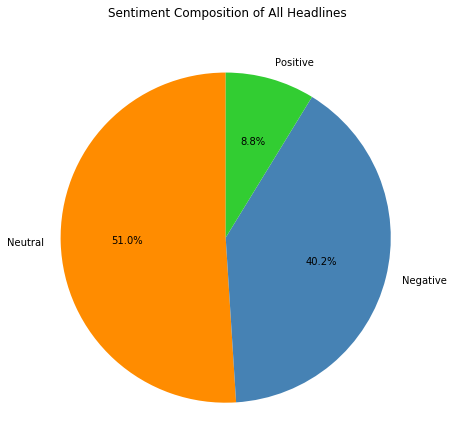

In [31]:
# Get the total number of Neutral, Negative, and Positive news headlines
count = sample['SENTIMENT_LABEL'].value_counts()

neutral = count[0]
negative = count[1]
positive = count[2]

# Define labels
labels = 'Neutral', 'Negative', 'Positive'

# Define the data
sizes = [neutral, negative, positive]

# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Pie Chart settings
ax1.pie(sizes, 
        labels = labels, 
        autopct = '%1.1f%%', 
        startangle = 90, colors = ['darkorange', 'steelblue', 'limegreen'])

# Makes the Pie Chart round
ax1.axis('equal')

# Plot settings
plt.title('Sentiment Composition of All Headlines', y = 1.1)
plt.tight_layout()

plt.show()

#### Interpretation of the Plot

The above Pie Chart shows the composition of the sentiment labels assigned to each news headline by the Watson API.

Surprisingly, it turned out that it's not the negative news that dominate the headlines. Neutral was the dominant category, while positive headlines were in the minority.

Even though negative is not the dominant category, there are still plenty of negative headlines. Negative news have a strong effect on people's emotions. Once someone seems a couple of negative headlines, they will have the negative feeling sitting at the back of their head.

After reading a couple of negative headlines people get emotional, they skip through the rest of the headlines, hence, they think that negative news dominate, even though that is not the case.

### Are There Trends/Patters in Morning News Headlines?

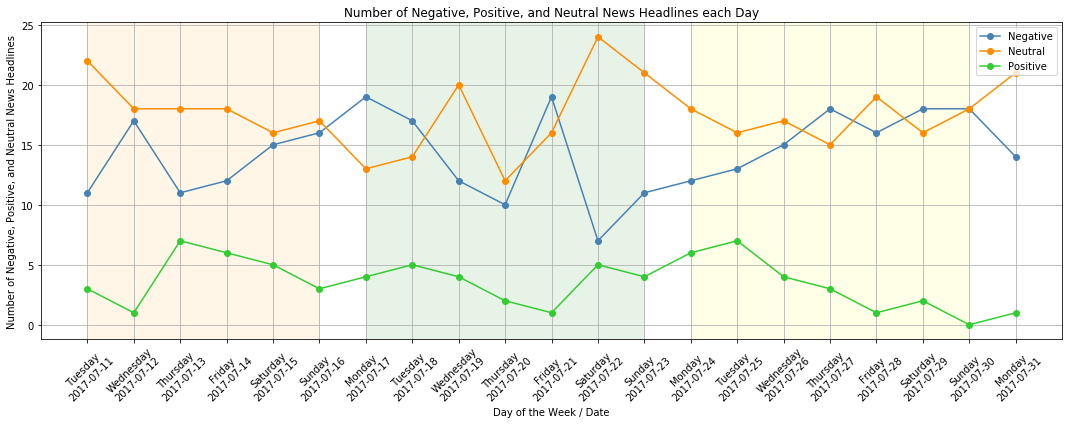

In [24]:
# Create emotions array, used when accessing `date_grouped` series
emotions = ['negative', 'neutral', 'positive']

# Get a list of all dates from the DATE column, ['2017-07-12', '2017-07-13', ...]
dates = list(complete_morning.groupby('DATE').groups.keys())
dates = sorted(dates)

# Get a list of days of the week from the `dates` list, ['Wednesday', 'Thursday', ...]
dates_df = pd.DataFrame(dates)
days_of_week = pd.to_datetime(dates_df[0]).dt.weekday_name
days_of_week = list(days_of_week)

# Create a list, which contains combinations of `dates` and `days_of_week`
days_of_week_dates = []

# Fill the `days_of_week_dates` list
for day, date in zip(days_of_week, dates):
    temp = day + '\n' + date
    days_of_week_dates.append(temp)

# Group rows by DATE
# In each group count the number of Negative, Neutral, and Positive news
# This will include news from morning, day, and evening
date_grouped = complete_morning.groupby('DATE').SENTIMENT_LABEL.value_counts()

# Keep track of the number of days
days_counter = 1
days_counter_list = []

# Keep track of the number of Negative, Neutral, and Positive news in each day
negative = []
neutral = []
positive = []

# Fill the `negative`, `neutral`, `positive`, and `days_counter_list` lists
for date in dates:
    for emotion in emotions:
        
        # We access the date_grouped series as follows
        # date_grouped['2017-07-12']['negative'] = number of negative news on 2017-07-12
        
        if emotion == 'negative':
            
            days_counter_list.append(days_counter)
            days_counter += 1
            
            try:
                negative.append(date_grouped[date][emotion])
            except:
                negative.append(0)
        
        if emotion == 'neutral':
            
            try:
                neutral.append(date_grouped[date][emotion])
            except:
                neutral.append(0)
        
        if emotion == 'positive':
            
            try:
                positive.append(date_grouped[date][emotion])
            except:
                positive.append(0)

# Plot Line Chart
fig1, ax1 = plt.subplots(figsize = (15, 6))

# Define lines
ax1.plot(days_counter_list, negative, marker='o', zorder = 3, label = 'Negative', color = 'steelblue')
ax1.plot(days_counter_list, neutral, marker='o', zorder = 3, label = 'Neutral', color = 'darkorange')
ax1.plot(days_counter_list, positive, marker='o', zorder = 3, label = 'Positive', color = 'limegreen')

# Define labels
plt.title('Trends in Morning News Headlines')
plt.xlabel('Day of the Week / Date')
plt.ylabel('Frequency of Negative, Positive, and Neutral News Headlines')

# Define x and y-axis ticks
plt.xticks(days_counter_list, days_of_week_dates, rotation = 45)
# plt.yticks(np.linspace(0, 25, 15))

# Plot settings
plt.grid(zorder = 0)
plt.legend()
plt.axvspan(1, 6, color='orange', alpha=0.09)
plt.axvspan(7, 13, color='green', alpha=0.09)
plt.axvspan(14, 20, color='yellow', alpha=0.09)
plt.tight_layout()

plt.show()

#### Interpretation of the Plot

Morning news are read more often, because people usually have more time in the morning, than in the evening, or during the day. Hence, I chose headlines collected in the morning, from all publishers, to be used to find patters.

Throughout the plot, the number of negative, neutral, and positive news seem to be stable, however, I have noticed that the number of negative and neutral news increase towards the end of the month, correspondingly the number of positive news drop.

I also have noticed that the negative line and the neutral line go hand in hand, the two lines donimate alternatively. The day of the week does not seem to play any role in this, the two lines sometimes dominate each other for multiple days (from 2017-07-12 to 2017-07-16, from 2017-07-21 to 2017-07-26), while in other times, the lines switch more frequently (from 2017-07-26 to 2017-07-30).

The reason for the alternating negative and neutral news, might be because the news publishers do not want people to fall into a complete depression, that's why they keep alternating the count of negative and neutral news.

Another reason for this negative and neutral phenomena, might be because publishers try to balance the composition of news, hence, they try to add headlines that are non-negative.

The positive line seems to be calm for the entire three weeks, the number of positive news seems to always stay low, never going above 7.

### Are There More Negative, Neutral, and/or Positive  News Headlines in the Morning, Day, and/or Evening?

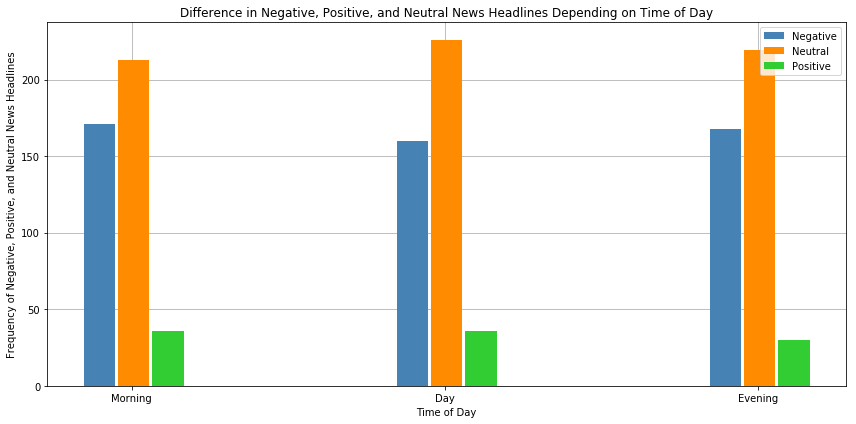

In [10]:
# Get the total number of Neutral, Negative, and Positive news headlines in the morning
# Returns a Series object containing negative, neutral, and positive count
morning_count = morning['SENTIMENT_LABEL'].value_counts()

# Get the total number of Neutral, Negative, and Positive news headlines during the day
# Returns a Series object containing negative, neutral, and positive count
day_count = day['SENTIMENT_LABEL'].value_counts()

# Get the total number of Neutral, Negative, and Positive news headlines during the day
# Returns a Series object containing negative, neutral, and positive count
evening_count = evening['SENTIMENT_LABEL'].value_counts()

# Define labels list
labels = ['Morning', 'Day', 'Evening']

# Plot Bar Chart
fig1, ax1 = plt.subplots(figsize = (12, 6))

# Bar Chart settings
ax1.bar([0, 1, 2], [morning_count['negative'], day_count['negative'], evening_count['negative']],
        zorder = 3, width = 0.1, color = 'steelblue', label = 'Negative')
ax1.bar([(x + 0.11) for x in [0, 1, 2]], [morning_count['neutral'], day_count['neutral'], evening_count['neutral']], 
        zorder = 3, width = 0.1, color = 'darkorange', label = 'Neutral')
ax1.bar([(x + 0.22) for x in [0, 1, 2]], [morning_count['positive'], day_count['positive'], evening_count['positive']], 
        zorder = 3, width = 0.1, color = 'limegreen', label = 'Positive')

# Define labels
plt.title('Number of Negative, Positive, and Neutral News Headlines Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency of Negative, Positive, and Neutral News Headlines')

# Define the tricks on the x-axis to be the country names
plt.xticks([(x + 0.104) for x in [0, 1, 2]], labels)

# Plot settings
plt.tight_layout()
plt.legend()
plt.grid(zorder = 0)

plt.show()

#### Interpretation of the Plot

Analyzing the chart, we can see that negative, neutral, and positive categories seem to be leveled throughout the day. If we look closely, then we can see that neutral is the dominant category during the day, negative is the dominant category in the morning, but there are less positive news in the evening than any other time of the day.

### Do Big Celebrations Have an Effect on the Number of Negative, Neutral, and Positive News Headlines?

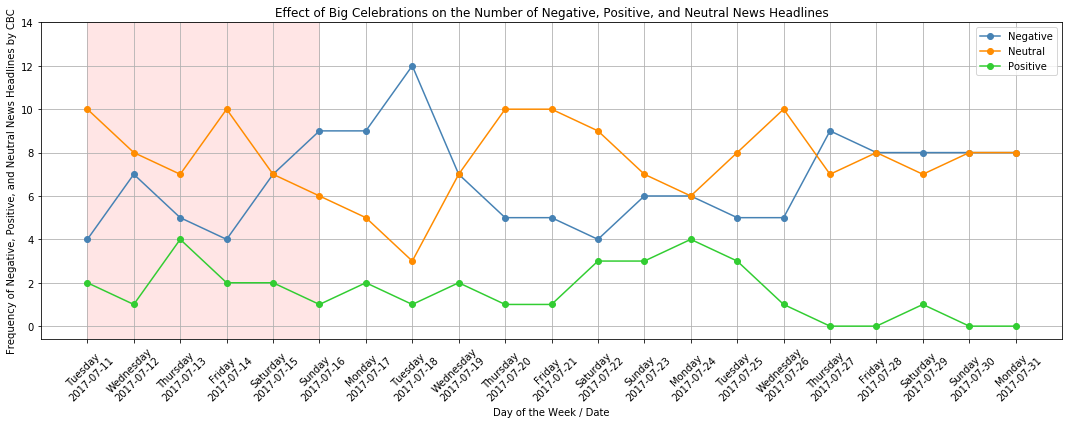

In [3]:
# Create emotions list, used when accessing `date_grouped` series
emotions = ['negative', 'neutral', 'positive']

# Get a list of all dates from the DATE column, ['2017-07-12', '2017-07-13', ...]
dates = list(stamp.groupby('DATE').groups.keys())
dates = sorted(dates)

# Get a list of days of the week from the `dates` list, ['Wednesday', 'Thursday', ...]
dates_df = pd.DataFrame(dates)
days_of_week = pd.to_datetime(dates_df[0]).dt.weekday_name
days_of_week = list(days_of_week)

# Create a list, which contains combinations of `dates` and `days_of_week`
days_of_week_dates = []

# Fill the `days_of_week_dates` list
for day, date in zip(days_of_week, dates):
    temp = day + '\n' + date
    days_of_week_dates.append(temp)

# Create a series of the number of negative, netural, and postiive news on each date
cbc_count = stamp.groupby(['DATE', 'NETWORK']).SENTIMENT_LABEL.value_counts()

# Keep track of the number of days
days_counter = 1
days_counter_list = []

# Keep track of the number of Negative, Neutral, and Positive news in each day
negative = []
neutral = []
positive = []

# Fill the `negative`, `neutral`, `positive`, and `days_counter_list` lists
for date in dates:
    for emotion in emotions:
        
        # We access the cbc_count series as follows
        # cbc_count['2017-07-12']['CBC']['negative'] = number of negative news from CBC publisher on 2017-07-12
        
        if emotion == 'negative':
            
            days_counter_list.append(days_counter)
            days_counter += 1
            
            try:
                negative.append(cbc_count[date]['CBC'][emotion])
            except:
                negative.append(0)
        
        if emotion == 'neutral':
            try:
                neutral.append(cbc_count[date]['CBC'][emotion])
            except:
                neutral.append(0)
        
        if emotion == 'positive':
            try:
                positive.append(cbc_count[date]['CBC'][emotion])
            except:
                positive.append(0)

# Plot Line Chart
fig1, ax1 = plt.subplots(figsize = (15, 6))

# Define lines
ax1.plot(days_counter_list, negative, marker='o', zorder = 3, label = 'Negative', color = 'steelblue')
ax1.plot(days_counter_list, neutral, marker='o', zorder = 3, label = 'Neutral', color = 'darkorange')
ax1.plot(days_counter_list, positive, marker='o', zorder = 3, label = 'Positive', color = 'limegreen')

# Define labels
plt.title('Effect of Big Celebrations on the Number of Negative, Positive, and Neutral News Headlines')
plt.xlabel('Day of the Week / Date')
plt.ylabel('Frequency of Negative, Positive, and Neutral News Headlines by CBC')

# Define x and y-axis ticks
plt.xticks(days_counter_list, days_of_week_dates, rotation = 45)
plt.yticks(np.arange(0, 16, 2))

# Plot settings
plt.grid(zorder = 0)
plt.axvspan(1, 6, color='red', alpha=0.1)
plt.legend()
plt.tight_layout()

plt.show()

#### Interpretation of the Plot

The above only uses news headlines from the CBC news publisher, since Stampede is a Canadian celebration, it would not make sence to include headlines from WT and RT.

Stampede is a festival that occures between Friday, July 7 (2017-07-07) and Sunday, July 16 (2017-07-16) every year. Since the collection of data started on 2017-07-11, which was roughly in the middle of Stampede, I had limited data and every headline was helpful, hence I only used the Morning dataset, which is the only set that had data starting from 2017-07-11.

The red highlighted area indicates the days of Stamepede that were recorder (from 2017-07-11 to 2017-07-16). There doesn't seem to be any anomalies in the number of negative, neutral, and positive news headlines in the red area. However, the number of negative, neutral, and positive seems to be more stable, always staying between the count of 1 and 10, which is not true for other days.

I have also observed a major increase in the number of negative news right after 2017-07-16, which was the last day of Stampede, as well as a major drop following soon after.

Observing the plot, I do not believe the hypothesis on businesses increasing the number of negative news to decrease the happiness in people, so the sales increase, was not supported.

### Which Emoition Dominates in the Morning, Day, and/or Evening?

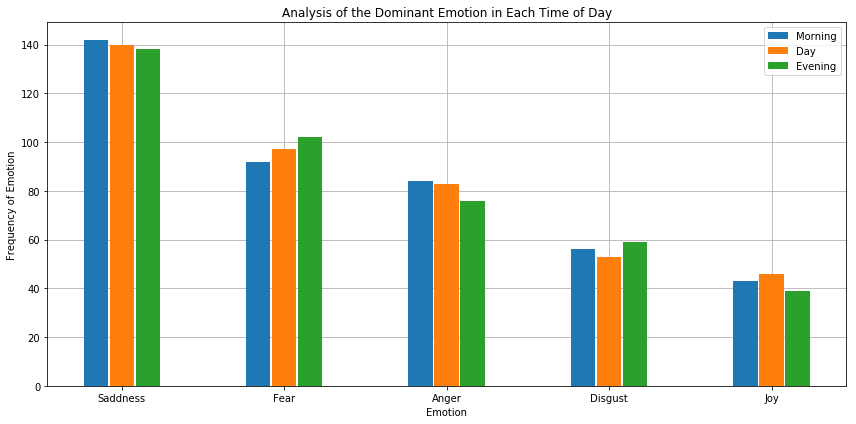

In [6]:
from operator import itemgetter

# Define a list labels
labels = ['Saddness', 'Fear', 'Anger', 'Disgust', 'Joy']

# Define a list of ids, which is the size of the number of emotions
ids = [0, 1, 2, 3, 4]

var_emotions = ['EMOTION_SADNESS', 'EMOTION_FEAR', 'EMOTION_ANGER', 'EMOTION_DISGUST', 'EMOTION_JOY']

morning_emotions = morning[['EMOTION_SADNESS', 'EMOTION_FEAR', 'EMOTION_ANGER', 'EMOTION_DISGUST', 'EMOTION_JOY']].idxmax(axis = 1, skipna = True)
morning_emotions_count = []
for i in var_emotions:
    morning_emotions_count.append(morning_emotions.value_counts()[i])
    
day_emotions = day[['EMOTION_SADNESS', 'EMOTION_FEAR', 'EMOTION_ANGER', 'EMOTION_DISGUST', 'EMOTION_JOY']].idxmax(axis = 1, skipna = True)
day_emotions_count = []
for i in var_emotions:
    day_emotions_count.append(day_emotions.value_counts()[i])

evening_emotions = evening[['EMOTION_SADNESS', 'EMOTION_FEAR', 'EMOTION_ANGER', 'EMOTION_DISGUST', 'EMOTION_JOY']].idxmax(axis = 1, skipna = True)
evening_emotions_count = []
for i in var_emotions:
    evening_emotions_count.append(evening_emotions.value_counts()[i])

# Plot Column Chart
fig1, ax1 = plt.subplots(figsize = (12, 6))

ax1.bar(ids, sorted([morning_emotions_count[x] for x in [0, 1, 2, 3, 4]], reverse = True), zorder = 3, width = 0.15, label = 'Morning')
ax1.bar([(x + 0.16) for x in ids], sorted([day_emotions_count[x] for x in [0, 1, 2, 3, 4]], reverse = True), zorder = 3, width = 0.15, label = 'Day')
ax1.bar([(x + 0.32) for x in ids], sorted([evening_emotions_count[x] for x in [0, 1, 2, 3, 4]], reverse = True), zorder = 3, width = 0.15, label = 'Evening')

# Define labels
plt.title('Analysis of the Dominant Emotion in Each Time of Day')
plt.xlabel('Emotion')
plt.ylabel('Frequency of Emotion')

# Define the tricks on the x-axis to be the country names
plt.xticks([(x + 0.16) for x in ids], labels)

# Plot settings
plt.tight_layout()
plt.legend()
plt.grid(zorder = 0)

plt.show()

#### Interpretation of the Plot

For this analysis, I plotted the frequency (took the highest emotion from every row, figured out the total occurance of each emotion) of each emotion in the Morning, Day, and Evening datasets.

From the chart, we can interpret that most headlines carry a message, which has very negative emotions assoiciating with it, such as saddness, fear, anger, and disgust.

We can also see that joy was picked up by the Watson API least often, hence, joy is the emotion that is found least throughout the day.

## Other Interesting Findings
---

### Who is the Most Famous President/Prime Minister?

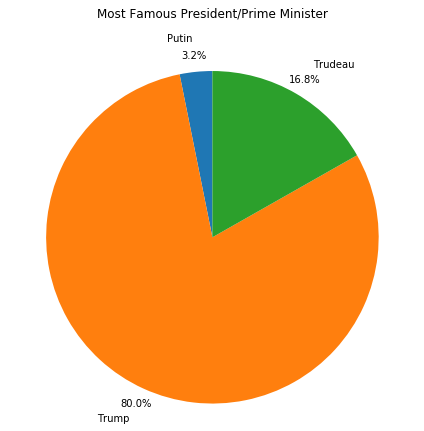

In [28]:
# Get the total number of occurance from the PUTIN column
putin_count = sample['PUTIN'].sum()

# Get the total number of occurance from the TRUMP column
trump_count = sample['TRUMP'].sum()

# Get the total number of occurance from the TRUDEAU column
trudeau_count = sample['TRUDEAU'].sum()

# Define labels
labels = 'Putin', 'Trump', 'Trudeau'

# Define the data
sizes = [putin_count, trump_count, trudeau_count]

# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Pie Chart settings
ax1.pie(sizes, 
        labels = labels, 
        autopct = '%1.1f%%', 
        pctdistance = 1.1, 
        labeldistance=1.2, 
        startangle = 90)

# Makes the Pie Chart round
ax1.axis('equal')

# Plot settings
plt.title('Most Famous President/Prime Minister', y = 1.1)
plt.tight_layout()

plt.show()

#### Interpretation of the Plot

As shown above, Trump is the most famous president. Trump's name was mentioned 329 times.

Note, the name Trump Jr. did not provide a biased result, since I made sure to check for this edge case and not include it in the total count.

### Which Country Makes It into the News Most Often?

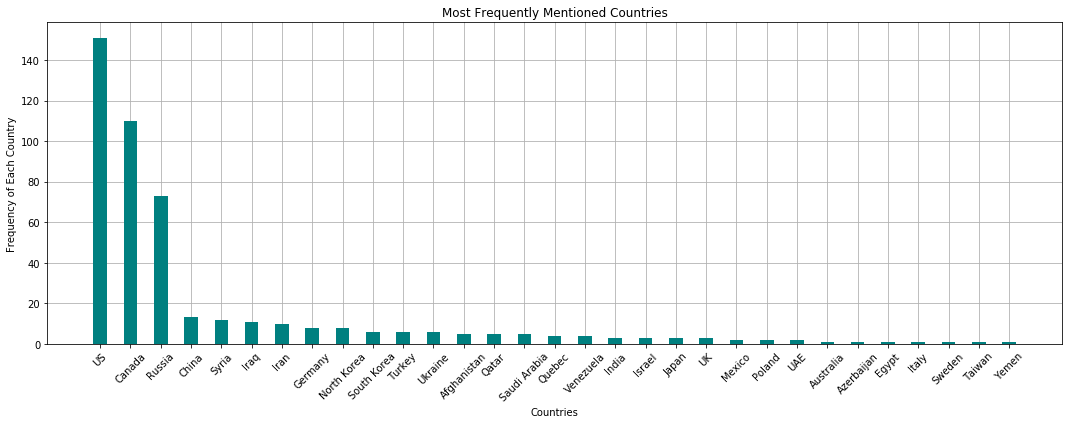

In [113]:
countries = [["Afghanistan", 5], ["Australia", 1], ["Azerbaijan", 1], ["Canada", 110], ["China", 13], ["Egypt", 1], ["Germany", 8], ["India", 3], 
             ["Iran", 10], ["Iraq", 11], ["Israel", 3], ["Italy", 1], ["Japan", 3], ["South Korea", 6], ["Mexico", 2], ["North Korea", 8], 
             ["Poland", 2], ["Qatar", 5], ["Quebec", 4], ["Russia", 73], ["Saudi Arabia", 5], ["Syria", 12], ["Sweden", 1], ["Taiwan", 1], ["Turkey", 6], 
             ["UAE", 2], ["UK", 3], ["US", 151], ["Ukraine", 6], ["Venezuela", 4], ["Yemen", 1]]
countries = sorted(countries, key = itemgetter(1), reverse = True)

# Create the x and y-axis lists
y = []
x = []

# Create the labels list
labels = []

counter = 1

# Fill the x and y-axis list with data
# Fill the labels list with names of countries
for country in countries:
        
    x.append(counter)
    counter += 1
    
    y.append(country[1])
    labels.append(country[0])

# Plot Bar Chart
fig1, ax1 = plt.subplots(figsize = (15, 6))

# Bar Chart settings
ax1.bar(x, y, zorder = 3, width = 0.45, color = 'teal')

# Define the tricks on the x-axis to be the country names
plt.xticks(x, labels, rotation = 45)

# Define labels
plt.title('Most Frequently Mentioned Countries')
plt.xlabel('Countries')
plt.ylabel('Frequency of Each Country')

# Plot settings
plt.tight_layout()
plt.grid(zorder = 0)

plt.show()

#### Interpretation of the Plot

As shown above, US, Canada, and Russia are the top three countries that make it into the news most often. However, the results may be biased, since the three news publishers used, were from those countries.

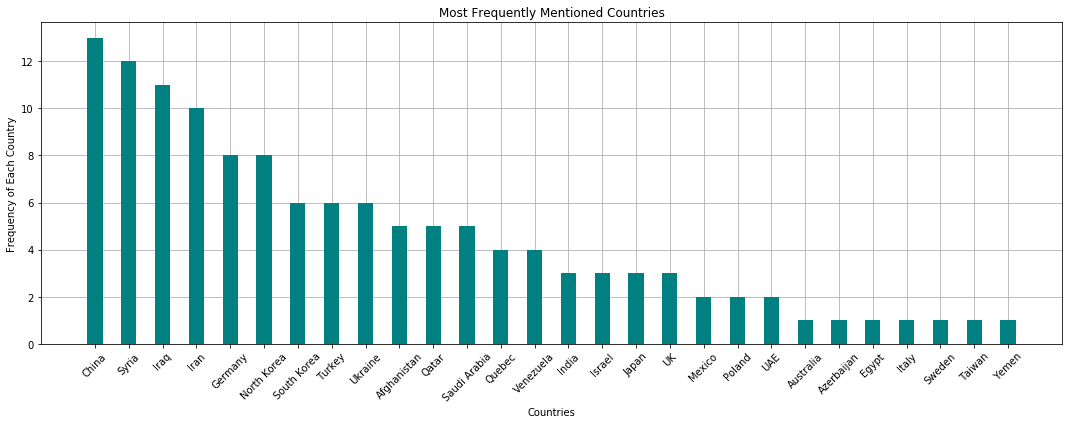

In [117]:
countries = [["Afghanistan", 5], ["Australia", 1], ["Azerbaijan", 1], ["China", 13], ["Egypt", 1], ["Germany", 8], ["India", 3], 
             ["Iran", 10], ["Iraq", 11], ["Israel", 3], ["Italy", 1], ["Japan", 3], ["South Korea", 6], ["Mexico", 2], ["North Korea", 8], 
             ["Poland", 2], ["Qatar", 5], ["Quebec", 4], ["Saudi Arabia", 5], ["Syria", 12], ["Sweden", 1], ["Taiwan", 1], ["Turkey", 6], 
             ["UAE", 2], ["UK", 3], ["Ukraine", 6], ["Venezuela", 4], ["Yemen", 1]]
countries = sorted(countries, key = itemgetter(1), reverse = True)

# Create the x and y-axis lists
y = []
x = []

# Create the labels list
labels = []

counter = 1

# Fill the x and y-axis list with data
# Fill the labels list with names of countries
for country in countries:
        
    x.append(counter)
    counter += 1
    
    y.append(country[1])
    labels.append(country[0])

# Plot Bar Chart
fig1, ax1 = plt.subplots(figsize = (15, 6))

# Bar Chart settings
ax1.bar(x, y, zorder = 3, width = 0.45, color = 'teal')

# Define the tricks on the x-axis to be the country names
plt.xticks(x, labels, rotation = 45)

# Define labels
plt.title('Most Frequently Mentioned Countries')
plt.xlabel('Countries')
plt.ylabel('Frequency of Each Country')

# Plot settings
plt.tight_layout()
plt.grid(zorder = 0)

plt.show()

#### Interpretation of the Plot

To better see the difference between the rest of the countries, I removed the top three most mentioned countries (US, Canada, and Russia) from this plot.

## Conclusion
---

Before beginning to work on this project, I, as many other average people, thought that negative news dominate the headlines. After completing the analysis, it was clear to me that in fact, combined, there are more neutral and positive news - 58.8% than there are negative - 40.2%.

Still, having so many negative news in the headlines, shows that news publishers are are not hiding the truth from us, they try to bring news from all parts of the world and inform their viewers/readers of everything that is happening in the world.

Having the knowledge of something bad happening in other places makes people more cautious and protective of their surroundings, other people around than, as well as themselves. The government and the media is doing a good job in protecting it's citizens by informing and warning them of anything suspicious or dangerous happening around them.

Analysing the effect big celebrations (Stampede Festival) have on the number of negative news, showed that there was no control or pressure over people, the number of negative, neutral, and positive news were more stable during the celebration days than other times.

In the conclusion, I just want to say that negative news are not trying to make us depressed, but in fact are really useful, they warn and caution people of many types of danger. Having the 58.8% and 40.2% split shows that the good and the bad in our world is balanced.